In [2]:
import pandas as pd

In [3]:
url = 'https://fbref.com/en/matches/cff46fe3/North-Carolina-Courage-Utah-Royals-May-17-2024-NWSL'

df = pd.read_html(url, attrs={'id': 'shots_all'})[0]

In [4]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                  2      Haley Hopkins            Courage               0.41   
1                  4      Haley Hopkins            Courage               0.40   
2                 14     Ashley Sanchez            Courage               0.06   
3                 30     Ashley Sanchez            Courage               0.04   
4                 30        Tyler Lussi            Courage               0.21   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0                NaN         Off Target                8.0         Right Foot   
1                NaN         Off Target               12.0         Right Foot   
2                NaN            Blocked               16.0         Right Foot   
3               0.05              Saved               28.0         Right Foot   
4               0.50              Saved                6.0          Left Foot   

  Unnamed: 8_level_0             SCA 1                        SCA 2  \
               Notes            Player        Event          Player   
0                NaN     Ryan Williams  Pass (Live)  Ashley Sanchez   
1                NaN  Manaka Matsukubo  Pass (Live)     Tyler Lussi   
2                NaN     Kaleigh Kurtz  Pass (Live)   Malia Berkely   
3                NaN     Malia Berkely  Pass (Live)   Kaleigh Kurtz   
4                NaN    Ashley Sanchez         Shot             NaN   

                
         Event  
0  Pass (Live)  
1  Pass (Live)  
2  Pass (Live)  
3  Pass (Live)  
4          NaN

In [5]:
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

In [6]:
df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes
0,2,Haley Hopkins,Courage,0.41,NaN,Off Target,8.0,Right Foot,NaN
1,4,Haley Hopkins,Courage,0.40,NaN,Off Target,12.0,Right Foot,NaN
2,14,Ashley Sanchez,Courage,0.06,NaN,Blocked,16.0,Right Foot,NaN
3,30,Ashley Sanchez,Courage,0.04,0.05,Saved,28.0,Right Foot,NaN
4,30,Tyler Lussi,Courage,0.21,0.50,Saved,6.0,Left Foot,NaN


In [7]:
df.columns=df.columns.droplevel(0)

In [8]:
df = df[['Minute', 'Player', 'Squad', 'xG', 'Outcome']]

In [9]:
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()

In [10]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,2,Haley Hopkins,Courage,0.41,Off Target,0.41
1,4,Haley Hopkins,Courage,0.40,Off Target,0.81
2,14,Ashley Sanchez,Courage,0.06,Blocked,0.87
3,30,Ashley Sanchez,Courage,0.04,Saved,0.91
4,30,Tyler Lussi,Courage,0.21,Saved,1.12
5,30,Ashley Sanchez,Courage,0.16,Blocked,1.28
6,30,Brianna Pinto,Courage,0.07,Off Target,1.35
7,44,Felicitas Rauch,Courage,0.02,Saved,1.37
8,NaN,NaN,NaN,NaN,NaN,NaN
9,46,Manaka Matsukubo,Courage,0.19,Blocked,1.56


In [11]:
df = df.dropna(subset=["Minute"])
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,2,Haley Hopkins,Courage,0.41,Off Target,0.41
1,4,Haley Hopkins,Courage,0.40,Off Target,0.81
2,14,Ashley Sanchez,Courage,0.06,Blocked,0.87
3,30,Ashley Sanchez,Courage,0.04,Saved,0.91
4,30,Tyler Lussi,Courage,0.21,Saved,1.12
5,30,Ashley Sanchez,Courage,0.16,Blocked,1.28
6,30,Brianna Pinto,Courage,0.07,Off Target,1.35
7,44,Felicitas Rauch,Courage,0.02,Saved,1.37
9,46,Manaka Matsukubo,Courage,0.19,Blocked,1.56
10,48,Tyler Lussi,Courage,0.26,Saved,1.82


In [12]:
df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 
                                   else 2)

C:\Users\fredd\AppData\Local\Temp\ipykernel_9408\3092056790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45


In [13]:
df.head()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
0,2,Haley Hopkins,Courage,0.41,Off Target,0.41,1
1,4,Haley Hopkins,Courage,0.40,Off Target,0.81,1
2,14,Ashley Sanchez,Courage,0.06,Blocked,0.87,1
3,30,Ashley Sanchez,Courage,0.04,Saved,0.91,1
4,30,Tyler Lussi,Courage,0.21,Saved,1.12,1


In [14]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
19,76,Kaleigh Kurtz,Courage,0.43,Goal,3.02,2
20,78,Ashley Sanchez,Courage,0.06,Blocked,3.08,2
21,80,Ashley Sanchez,Courage,0.05,Off Target,3.13,2
22,83,Hannah Betfort,Royals,0.11,Off Target,0.15,2
23,90+1,Hannah Betfort,Royals,0.07,Off Target,0.22,2


In [15]:
df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))

C:\Users\fredd\AppData\Local\Temp\ipykernel_9408\2303675244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))


In [16]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
19,76,Kaleigh Kurtz,Courage,0.43,Goal,3.02,2
20,78,Ashley Sanchez,Courage,0.06,Blocked,3.08,2
21,80,Ashley Sanchez,Courage,0.05,Off Target,3.13,2
22,83,Hannah Betfort,Royals,0.11,Off Target,0.15,2
23,91,Hannah Betfort,Royals,0.07,Off Target,0.22,2


Text(0.1, 0.0, '@freddys_canvas/twitter')

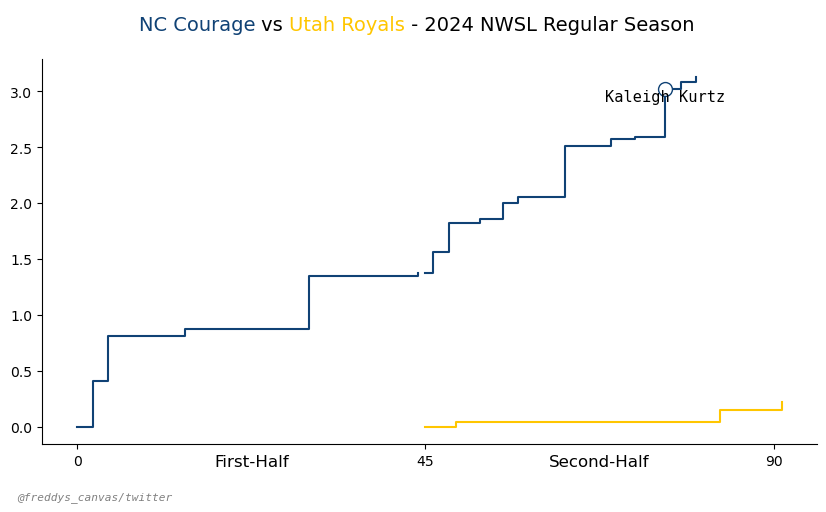

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

courage_color = '#104275'
royals_color = '#FFC600'

for team in df['Squad'].unique():
    team_df = df[df['Squad'] == team]
    
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]), 
                         team_df[team_df['half'] == 2]])
    

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
               half_df['Minute'],
               half_df['cumulative_xG'],
                label=team,
                drawstyle='steps-post',
                c = courage_color if team=='Courage' else royals_color
            )
        
        # We Can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=courage_color if team == 'Courage' else royals_color,
            s=100,
            # We want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] - .07, 
            x['Player'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=11,
            zorder=10
        )
        
ax.set_xticks([0, 45, 90])
    
ax.text(22.5, -.35, 'First-Half', ha='center', fontsize=12)
ax.text(67.5, -.35, 'Second-Half', ha='center', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<NC Courage> vs <Utah Royals> - 2024 NWSL Regular Season',
    fontsize=14,
    ha='center',
    va='center',
    ax=ax,
    highlight_textprops=[{'color': courage_color}, {'color': royals_color}]
)

fig.text(
    0.1, 
    0.00, 
    '@freddys_canvas/twitter', 
    fontsize=8, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)